In [14]:
import matplotlib.pyplot as plt
from pickle import dump, load


In [15]:
OPT_LEVELS = ["-O2", "-O3", "-Os", "-Ofast"]
SNIPPET_DIR = 'snippet_dataset/'

METHODS = {
    "std::deque::operator[]",
    "std::deque::pop_front",
    "std::deque::push_back",
    "std::map::find",
    "std::map::lower_bound",
    "std::map::operator[]",
    "std::map::upper_bound",
    "std::vector::clear",
    "std::vector::erase",
    "std::vector::push_back",
    "std::vector::reserve",
    "std::vector::resize"
}

class snippet:
    def __init__ (self, name, opt, train, test):
        self.name = name
        self.opt = opt
        self.train = train[:]
        self.test = test[:]

In [16]:
with open("pickled_data.pickle", "rb") as pickled_file:
    snippet_list = load(pickled_file)

In [17]:
for elem in snippet_list[:10]:
    print(elem.name)
    print(elem.opt)
    print ('\n'.join(str(p) for p in elem.train))

a.out-std::vector::resize-['0x3ce0', '0x3d21'].txt
-O2
endbr64
push r13
lea rax  [ rip + 0x2f9b ]
mov esi 0xa
push r12
push rbp
push rbx
mov rbx rdi
lea rdi  [ rdi + 0x8 ]
sub rsp 0x8
mov QWORD PTR  [ rdi - 0x8 ]  rax
mov QWORD PTR  [ rdi ]  0x0
mov QWORD PTR  [ rdi + 0x8 ]  0x0
mov QWORD PTR  [ rdi + 0x10 ]  0x0
call 0x60
a.out-std::vector::resize-['0x4190', '0x41d1'].txt
-O3
endbr64
push r13
lea rax  [ rip + 0x2afb ]
mov esi 0xa
push r12
push rbp
push rbx
mov rbx rdi
lea rdi  [ rdi + 0x8 ]
sub rsp 0x8
mov QWORD PTR  [ rdi - 0x8 ]  rax
mov QWORD PTR  [ rdi ]  0x0
mov QWORD PTR  [ rdi + 0x8 ]  0x0
mov QWORD PTR  [ rdi + 0x10 ]  0x0
call 0x60
a.out-std::vector::resize-['0x31fe', '0x323c'].txt
-Os
endbr64
lea rax  [ rip + 0x2a7f ]
push r13
mov esi 0xa
push r12
push rbp
push rbx
mov rbx rdi
lea rdi  [ rdi + 0x8 ]
push rdx
mov QWORD PTR  [ rdi - 0x8 ]  rax
mov QWORD PTR  [ rdi ]  0x0
mov QWORD PTR  [ rdi + 0x8 ]  0x0
mov QWORD PTR  [ rdi + 0x10 ]  0x0
call 0xfc
messenger_server-std::vector

In [7]:
opt_count = {o : 0 for o in OPT_LEVELS}
    
for snippet in snippet_list:
    opt_count[snippet.opt] +=1
opt_perc = {key : opt_count[key]/len(snippet_list) for key in opt_count}

print(opt_count)
print(len(snippet_list))
print(opt_perc)


{'-O2': 8835, '-O3': 9662, '-Os': 4841, '-Ofast': 363}
23701
{'-O2': 0.3727690814733556, '-O3': 0.4076621239610143, '-Os': 0.20425298510611367, '-Ofast': 0.015315809459516477}


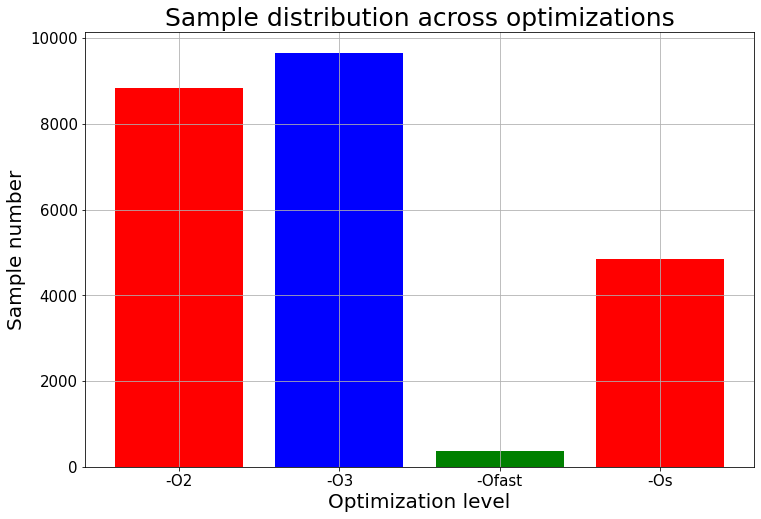

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

x = sorted(opt_count.keys())
y = [opt_count[k] for k in x]
colors = ["red", "blue", "green"]
ax.bar(x, y, color=colors)
ax.set_xlabel("Optimization level", fontsize=20)
ax.set_ylabel("Sample number", fontsize=20)
ax.set_title("Sample distribution across optimizations", fontsize=25)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=15)

In [9]:
def extract_name(snippet):
    candidates = snippet.name.split("-")
    for i in candidates:
        if i[:5] == "std::":
            return i

In [10]:
methods_count = {m : 0 for m in METHODS}

for snippet in snippet_list:
    name = extract_name(snippet)
    methods_count[name] += 1
    

methods_perc = {key : methods_count[key]/len(snippet_list) for key in methods_count}

print (methods_perc)

{'std::vector::erase': 0.023458925783722207, 'std::map::operator[]': 0.06096789165014135, 'std::deque::pop_front': 0.023458925783722207, 'std::vector::push_back': 0.4972364035272773, 'std::vector::resize': 0.05552508332981731, 'std::vector::clear': 0.0, 'std::deque::push_back': 0.08396270199569639, 'std::map::upper_bound': 0.0, 'std::vector::reserve': 0.008354077887008987, 'std::deque::operator[]': 0.048774313320113075, 'std::map::find': 0.10742162777941859, 'std::map::lower_bound': 0.09084004894308258}


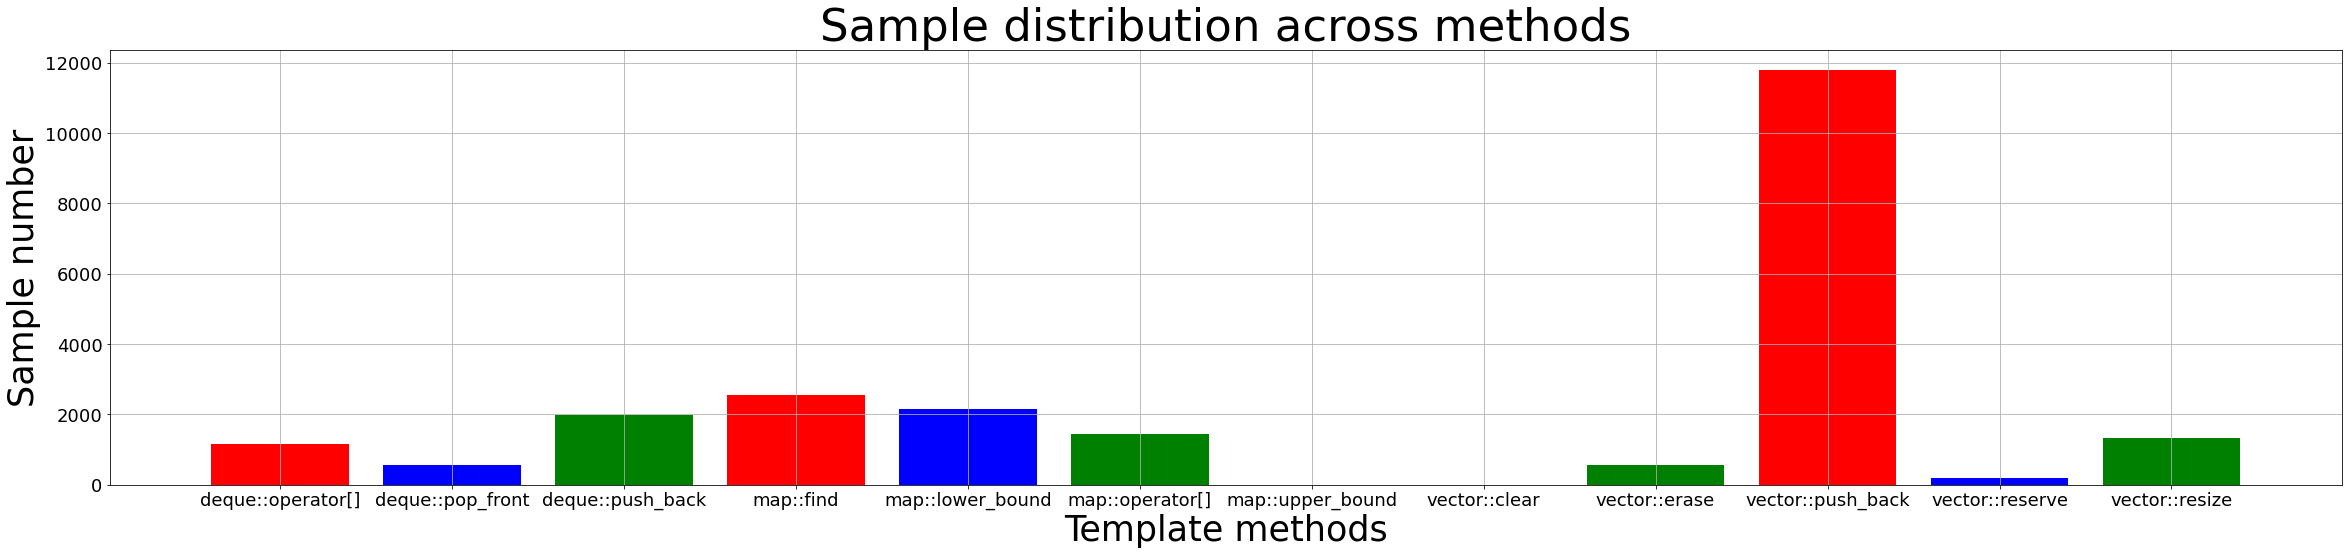

In [11]:
fig, ax = plt.subplots(figsize=(40,8))

x = [k[5:] for k in sorted(methods_count.keys())]
y = [methods_count[k] for k in sorted(methods_count.keys())]
colors = ["red", "blue", "green"]
ax.bar(x, y, color=colors)
ax.set_xlabel("Template methods", fontsize=35)
ax.set_ylabel("Sample number", fontsize=35)
ax.set_title("Sample distribution across methods", fontsize=45)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=18)

std::map::find
std::vector::erase


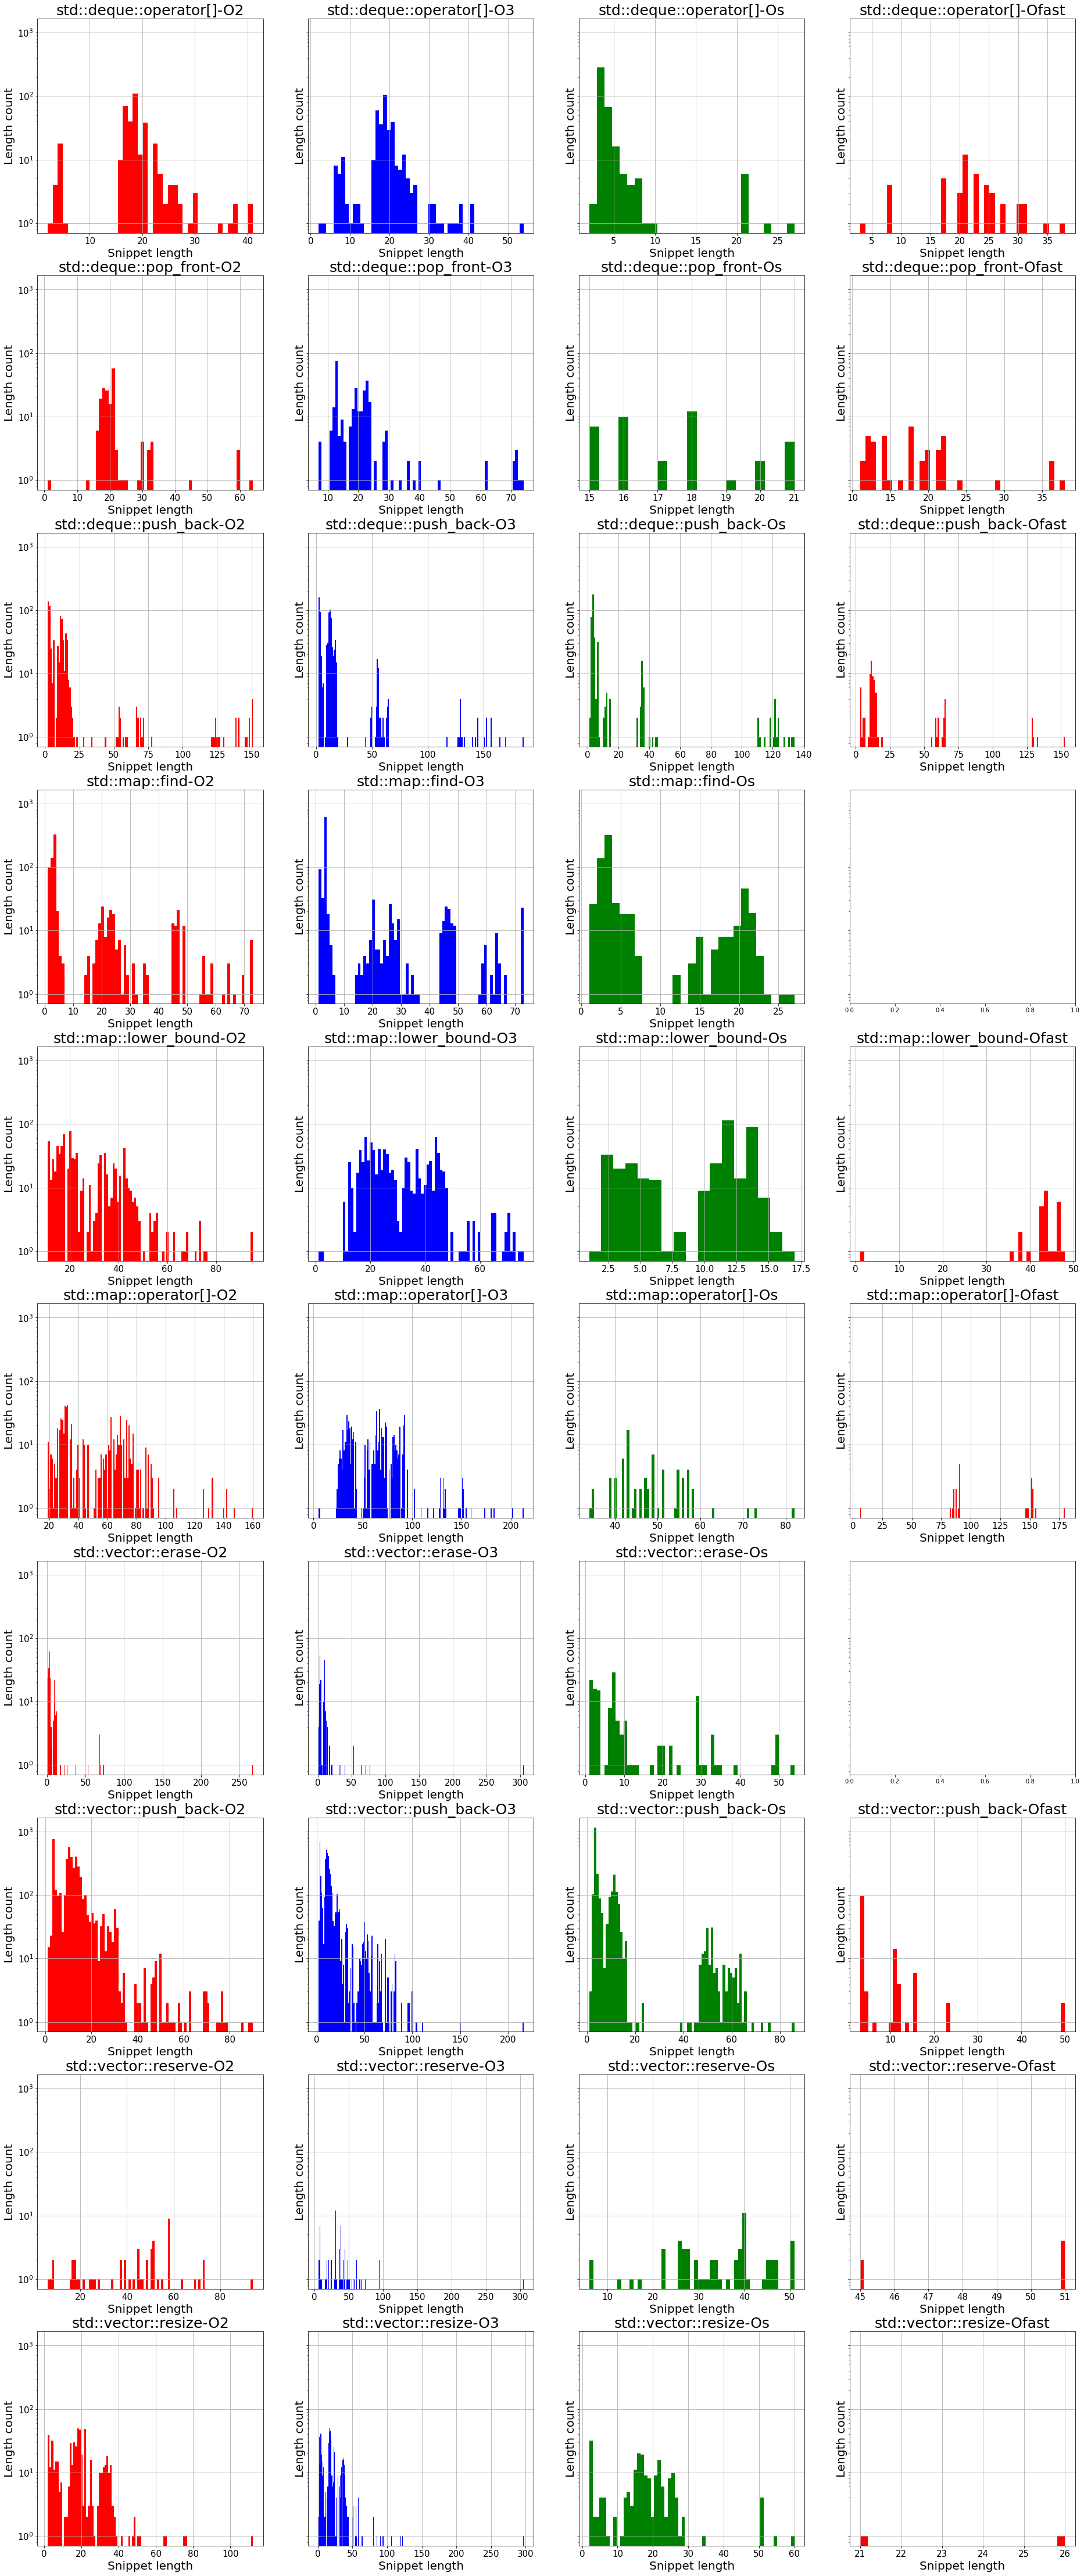

In [13]:
numopt = len(OPT_LEVELS)
methods = [
    "std::deque::operator[]",
    "std::deque::pop_front",
    "std::deque::push_back",
    "std::map::find",
    "std::map::lower_bound",
    "std::map::operator[]",
    #"std::map::upper_bound",
   # "std::vector::clear",
    "std::vector::erase",
    "std::vector::push_back",
    "std::vector::reserve",
    "std::vector::resize"
]
nummethods = len(methods)

fig, axs = plt.subplots(nummethods, numopt, figsize=(8*numopt, 8*nummethods), sharey=True)

colors = ["red", "blue", "green"]
for j in range(nummethods):
    for i in range(numopt):
        len_list = list((len(snippet.test) for snippet in snippet_list if (snippet.opt == OPT_LEVELS[i] and extract_name(snippet) == methods[j])))
      
        if not len_list: 
            print(methods[j])
            continue
        ceil = max(len_list)

        axs[j][i].hist(len_list, ceil, log=True, color=colors[i%3])
        axs[j][i].set_xlabel("Snippet length", fontsize=20)
        axs[j][i].set_ylabel("Length count", fontsize=20)
        axs[j][i].set_title(methods[j]+OPT_LEVELS[i], fontsize=25)
        axs[j][i].grid(True)
        axs[j][i].tick_params(axis='both', which='major', labelsize=15)